In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv("한국문화컨텐츠 소비 비중정보.csv")

In [9]:
data

,IEM_NM,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,REPRT_YEAR_CN,EXAMIN_COUNTRY_NM,CNTNTS_URL
0,한국 문화콘텐츠 소비(시간),18.18,16.65,19.69,22.03,20.68,13.26,13.44,19.87,2021,중국,드라마
1,소비 비중(%),29.37,27.92,30.80,29.99,31.80,26.40,28.36,30.91,2021,중국,드라마
2,월평균 지출 금액($),7.46,8.12,6.82,6.08,7.14,6.42,5.46,20.56,2021,중국,드라마
3,한국 문화콘텐츠 소비(시간),13.29,11.76,14.76,14.25,13.65,13.17,8.31,15.45,2021,중국,예능
4,소비 비중(%),28.46,25.52,31.29,24.85,27.79,28.91,30.65,37.55,2021,중국,예능
...,...,...,...,...,...,...,...,...,...,...,...,...
2593,월평균 지출 금액($),8.54,8.50,8.57,8.80,9.11,8.48,8.55,7.02,2021,아르헨티나,패션
2594,소비 비중(%),18.67,20.35,18.02,17.82,21.56,18.71,13.50,13.00,2021,아르헨티나,뷰티
2595,월평균 지출 금액($),8.41,9.01,8.17,9.34,7.66,9.86,7.42,4.96,2021,아르헨티나,뷰티
2596,소비 비중(%),13.27,13.58,12.95,15.45,16.47,9.63,12.19,11.07,2021,아르헨티나,음식


In [4]:
#년도에 따라 소비비중의 차이가 있는지를 확인하기 위해, 2020년 2021년으로 데이터를 나눔
data=data[data["IEM_NM"]=="소비 비중(%)"]

data=data[["EXAMIN_COUNTRY_NM","CNTNTS_URL","ALL_TOTAL_CO","REPRT_YEAR_CN"]]

data_2021=data[data["REPRT_YEAR_CN"]=="2021"]
data_2020=data[data["REPRT_YEAR_CN"]=="2020"]

C:\Users\김규리\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


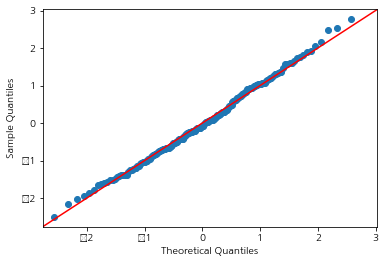

In [33]:
import statsmodels.api as sm
#정규성 검사
#2021년 데이터
fig=sm.qqplot(data_2021["ALL_TOTAL_CO"], line='45',fit=True)
plt.show()

In [34]:
from scipy.stats import shapiro
#정확하게 알아보기 위해 shapiro test진행
shapiro(data_2021["ALL_TOTAL_CO"])

ShapiroResult(statistic=0.9942094087600708, pvalue=0.6393151879310608)

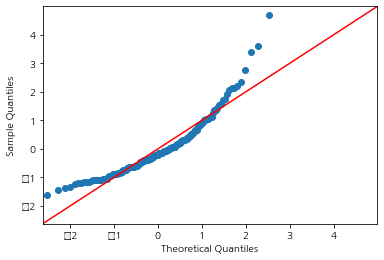

In [35]:
#2020년 데이터
fig=sm.qqplot(data_2020["ALL_TOTAL_CO"], line='45',fit=True)
plt.show()
#qq-plot을 그려보았을 때, 직선을 기준으로 벗어난 데이터가 있으므로 정규성을 따른다고 보기 어렵다

In [36]:
#정확하게 알아보기 위해 shapiro test진행
shapiro(data_2020["ALL_TOTAL_CO"])

ShapiroResult(statistic=0.8925575017929077, pvalue=9.320400007339913e-10)

23.290202020202035 23.309411764705885 22.73 21.45


C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


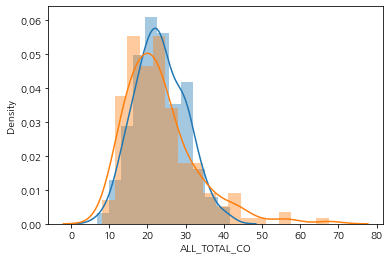

In [37]:
fig,ax=plt.subplots()
sns.distplot(data_2021["ALL_TOTAL_CO"],ax=ax)
sns.distplot(data_2020["ALL_TOTAL_CO"],ax=ax)
print(np.mean(data_2021["ALL_TOTAL_CO"]),np.mean(data_2020["ALL_TOTAL_CO"]),np.median(data_2021["ALL_TOTAL_CO"]),np.median(data_2020["ALL_TOTAL_CO"]))

#distplot을 그려봄

In [17]:
#등분산성 검사
#bartlett이용
stats.bartlett(data_2021["ALL_TOTAL_CO"],data_2020["ALL_TOTAL_CO"])

BartlettResult(statistic=23.66623771369452, pvalue=1.145750632131179e-06)

In [18]:
stats.levene(data_2021["ALL_TOTAL_CO"],data_2020["ALL_TOTAL_CO"])

LeveneResult(statistic=6.4375254033389755, pvalue=0.011587824246663188)

In [17]:
#distplot을 그려보았을 때 분포의 차이가 보였으며, 정규성 검사를 하였을 때 2020년 데이터가 정규성을 따르지 않음을 확인할 수 있다
#bartlett과 levene 둘다 모두 p값은 0.05보다 낮게 나옴
#그러나 충분한 표본수가 확보되었기 때문에 중심극한정리에 의해 정규분포를 띈다고 가정하여 모수적인 방법을 수행해본다.
#따라서 2021년 2020년 모두 정규분포를 띈다고 가정하고, levene에 의해 p값이 0.05보다 작으므로 two sample t-test를 진행함

In [5]:
#년도별로 비교하여 k-컨텐츠의 소비 비중 차이가 있는지를 확인해보기 위한 test를 해줌
stats.ttest_ind(data_2021["ALL_TOTAL_CO"],data_2020["ALL_TOTAL_CO"],equal_var=False)

Ttest_indResult(statistic=-0.02221492185618527, pvalue=0.9822915249648404)

C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


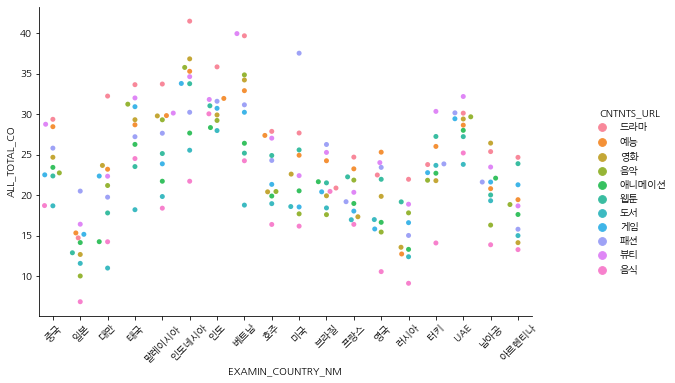

In [38]:
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

fig=sns.catplot(x="EXAMIN_COUNTRY_NM", y="ALL_TOTAL_CO", hue="CNTNTS_URL", data=data_2021, kind="swarm")
fig.fig.set_size_inches(10,5)
plt.xticks(rotation=45)
plt.show()

#2021년을 기준으로 18개국의 k-컨텐츠 소비 비중을 분석해보았을 때
#대부분 국가에서 1등이 드라마

In [23]:
drama = data[data["CNTNTS_URL"]=="드라마"]["ALL_TOTAL_CO"].mean()
entertain = data[data["CNTNTS_URL"]=="예능"]["ALL_TOTAL_CO"].mean()
movie = data[data["CNTNTS_URL"]=="영화"]["ALL_TOTAL_CO"].mean()
music = data[data["CNTNTS_URL"]=="음악"]["ALL_TOTAL_CO"].mean()
anima = data[data["CNTNTS_URL"]=="애니메이션"]["ALL_TOTAL_CO"].mean()
book = data[data["CNTNTS_URL"]=="도서"]["ALL_TOTAL_CO"].mean()
webtoon = data[data["CNTNTS_URL"]=="웹툰"]["ALL_TOTAL_CO"].mean()
game = data[data["CNTNTS_URL"]=="게임"]["ALL_TOTAL_CO"].mean()
fashion = data[data["CNTNTS_URL"]=="패션"]["ALL_TOTAL_CO"].mean()
beauty = data[data["CNTNTS_URL"]=="뷰티"]["ALL_TOTAL_CO"].mean()
food = data[data["CNTNTS_URL"]=="음식"]["ALL_TOTAL_CO"].mean()
food

17.45611111111111

<AxesSubplot:xlabel='콘텐츠'>

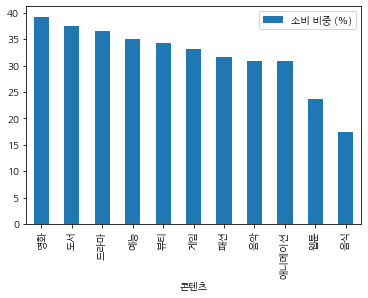

In [24]:
content = ["드라마", "예능", "영화", "음악", "애니메이션", "도서", "웹툰", "게임", "패션", "뷰티", "음식"]
mean = [drama, entertain, movie, music, anima, book, webtoon, game, fashion, beauty, food]

plt.rcParams["font.family"]="NanumGothic"

df = pd.DataFrame({"콘텐츠":content, "소비 비중 (%)":mean})
df = df.sort_values(by=["소비 비중 (%)"], ascending=False)
df.plot.bar(x="콘텐츠", y="소비 비중 (%)")
#콘텐츠 별 소비 비중 퍼센티지 bar그래프